In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FP/time_series_60min_singleindex.csv')

In [ ]:
data.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Columns: 300 entries, utc_timestamp to UA_load_forecast_entsoe_transparency
dtypes: float64(298), object(2)
memory usage: 1.9+ MB


In [ ]:
data.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BE_load_actual_entsoe_transparency',
       'BE_load_forecast_entsoe_transparency', 'BE_solar_generation_actual',
       ...
       'SI_load_actual_entsoe_transparency',
       'SI_load_forecast_entsoe_transparency', 'SI_solar_generation_actual',
       'SI_wind_onshore_generation_actual',
       'SK_load_actual_entsoe_transparency',
       'SK_load_forecast_entsoe_transparency', 'SK_solar_generation_actual',
       'SK_wind_onshore_generation_actual',
       'UA_load_actual_entsoe_transparency',
       'UA_load_forecast_entsoe_transparency'],
      dtype='object', length=300)

In [ ]:
data.sum()

,0
utc_timestamp,2014-12-31T23:00:00Z2015-01-01T00:00:00Z2015-0...
cet_cest_timestamp,2015-01-01T00:00:00+01002015-01-01T01:00:00+01...
AT_load_actual_entsoe_transparency,5777524.0
AT_load_forecast_entsoe_transparency,6290294.0
AT_price_day_ahead,23677.0
...,...
SK_load_forecast_entsoe_transparency,2875790.0
SK_solar_generation_actual,13352.85
SK_wind_onshore_generation_actual,0.0
UA_load_actual_entsoe_transparency,0.0


In [ ]:
data.describe()

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,BE_wind_generation_actual,BE_wind_offshore_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
count,831.000000,831.000000,783.000000,824.000000,831.000000,831.000000,831.000000,823.000000,821.000000,821.000000,...,829.000000,829.000000,822.000000,829.000000,829.000000,829.000000,715.000000,0.0,0.0,0.0
mean,6952.495788,7569.547533,30.238825,20.713592,683.377858,11309.483755,11112.101083,96.884447,759.432156,368.957052,...,1515.254210,1501.161641,8.040097,0.303607,3447.856454,3468.986731,18.675315,NaN,NaN,NaN
std,1169.143436,891.076641,14.670653,35.086569,602.581368,1299.679441,1301.139824,206.569760,522.119027,235.858046,...,248.026712,262.635179,16.218132,0.762717,409.242496,407.414003,38.559066,NaN,NaN,NaN
min,3767.000000,5713.000000,-23.000000,0.000000,1.000000,8122.000000,8036.000000,0.000000,4.960000,0.140000,...,983.790000,803.000000,0.000000,0.000000,2575.000000,2580.000000,0.400000,NaN,NaN,NaN
25%,6073.500000,6800.000000,22.000000,0.000000,188.000000,10309.500000,10055.500000,0.000000,273.570000,129.330000,...,1293.850000,1256.000000,0.000000,0.000000,3101.000000,3120.000000,0.400000,NaN,NaN,NaN
50%,6887.000000,7469.000000,30.000000,0.000000,437.000000,11352.000000,11160.000000,0.000000,657.380000,371.680000,...,1531.210000,1556.000000,0.000000,0.000000,3460.000000,3470.000000,1.300000,NaN,NaN,NaN
75%,7859.500000,8440.000000,40.000000,32.250000,1251.000000,12543.000000,12368.500000,73.650000,1242.080000,621.970000,...,1723.890000,1738.000000,8.812500,0.000000,3858.000000,3880.000000,14.950000,NaN,NaN,NaN
max,9721.000000,9320.000000,67.000000,168.000000,1965.000000,13670.000000,13454.000000,1326.080000,1670.780000,678.450000,...,1946.790000,1901.000000,93.600000,3.230000,4118.000000,4150.000000,221.800000,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select numerical features and drop columns with all missing values
data_cleaned = data.select_dtypes(include=[float, int])
data_cleaned = data_cleaned.dropna(axis=1, how='all')

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_cleaned)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_imputed)

# Apply PCA, retaining 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Print shapes
print(f"Original shape: {X_scaled.shape}, Reduced shape after PCA: {X_pca.shape}")

Original shape: (832, 272), Reduced shape after PCA: (832, 38)


In [ ]:
selected_columns = [
    'AT_solar_generation_actual', 'ES_solar_generation_actual',
    'FR_solar_generation_actual', 'DK_solar_generation_actual', 'BE_solar_generation_actual',

    'AT_wind_onshore_generation_actual',
    'DE_wind_offshore_generation_actual', 'DK_wind_onshore_generation_actual',
    'DK_wind_offshore_generation_actual', 'BE_wind_onshore_generation_actual',
    'ES_wind_onshore_generation_actual',

    'DE_solar_capacity', 'DE_wind_onshore_capacity', 'DE_wind_offshore_capacity',
    'DK_wind_onshore_capacity', 'DK_wind_offshore_capacity',

    'AT_load_actual_entsoe_transparency', 'DE_load_actual_entsoe_transparency',
    'ES_load_actual_entsoe_transparency', 'FR_load_actual_entsoe_transparency',
    'DK_load_actual_entsoe_transparency', 'BE_load_actual_entsoe_transparency'
]

In [ ]:
target_columns = ['DE_solar_generation_actual', 'DE_wind_onshore_generation_actual']

In [ ]:
X = data[selected_columns]
y = data[target_columns]

In [ ]:
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

<ipython-input-12-dcfa16c93e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
<ipython-input-12-dcfa16c93e41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(y.mean(), inplace=True)


In [ ]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [ ]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
def residual_block(x, units):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = Dense(units)(x)
    x = Add()([x, shortcut])  # Add the shortcut (skip connection)
    x = tf.keras.layers.ReLU()(x)
    return x

In [ ]:
input_layer = Input(shape=(X_train.shape[1],))

In [ ]:
x = Dense(128, activation='relu')(input_layer)
x = residual_block(x, 128)
x = residual_block(x, 128)

In [ ]:
output_layer = Dense(2, activation='linear')(x)

In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.summary()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 22)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          2,944 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         16,512 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 128)            │         16,512 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 128)            │              0 │ dense_2[0][0],         │
│                           │                        │                │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 128)            │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │         16,512 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 128)            │         16,512 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 128)            │              0 │ dense_4[0][0],         │
│                           │                        │                │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 128)            │              0 │ add_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 2)              │            258 │ re_lu_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 69,250 (270.51 KB)

 Trainable params: 69,250 (270.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2168 - mae: 0.3047 - val_loss: 0.0285 - val_mae: 0.1218
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - mae: 0.1098 - val_loss: 0.0146 - val_mae: 0.0862
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mae: 0.0855 - val_loss: 0.0097 - val_mae: 0.0739
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0102 - mae: 0.0721 - val_loss: 0.0081 - val_mae: 0.0671
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0077 - mae: 0.0605 - val_loss: 0.0072 - val_mae: 0.0628
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075 - mae: 0.0614 - val_loss: 0.0062 - val_mae: 0.0561
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0066 - mae: 0.0575 - val_loss: 0.0058 - val_mae: 0.0573
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - mae: 0.0494 - val_loss: 0.0049 - val_mae: 0.0508
Epoch 9/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [ ]:
y_pred_scaled = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

In [ ]:
r2 = r2_score(y_test_original, y_pred)
print(f"R-squared (R²) score: {r2}")

R-squared (R²) score: 0.9745140705745421


In [ ]:
model.save('ResNet.h5')

import joblib
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

In [ ]:
model.save('D:\FP\ResNet.h5')
import joblib

In [ ]:
joblib.dump(scaler_X, 'D:\FP\scaler_X.pkl')
joblib.dump(scaler_y, 'D:\FP\scaler_y.pkl')

['D:\\FP\\scaler_y.pkl']

In [ ]:
from google.colab import files
files.download('ResNet.h5')
files.download('scaler_X.pkl')
files.download('scaler_y.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

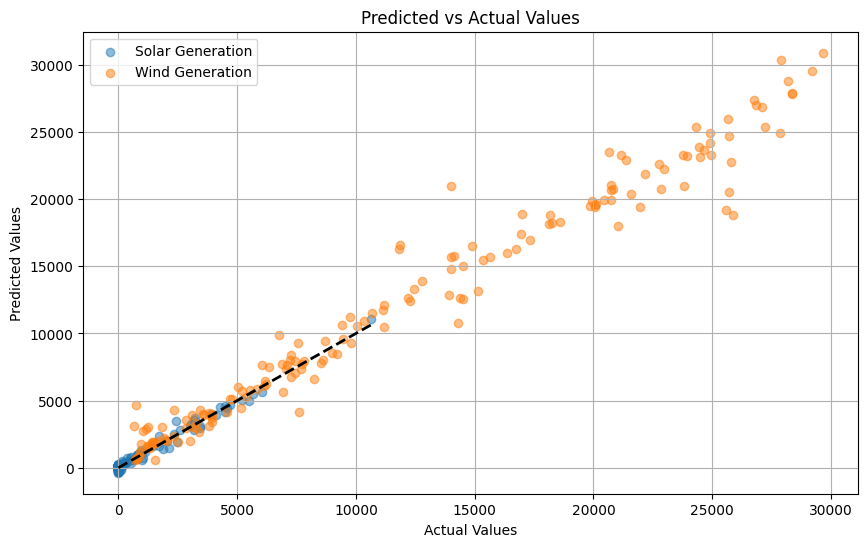

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original[:, 0], y_pred[:, 0], label='Solar Generation', alpha=0.5)
plt.scatter(y_test_original[:, 1], y_pred[:, 1], label='Wind Generation', alpha=0.5)
plt.plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()],
         [y_test_original[:, 0].min(), y_test_original[:, 0].max()], 'k--', lw=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

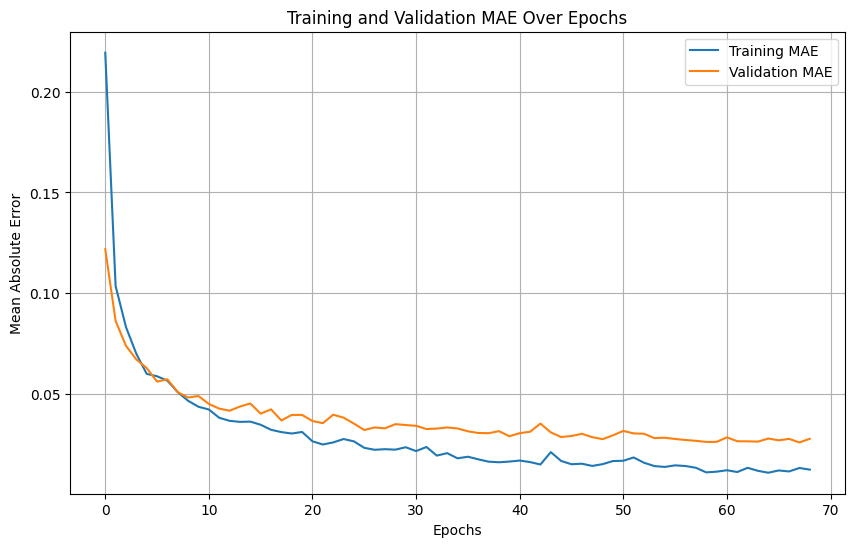

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid()
plt.show()

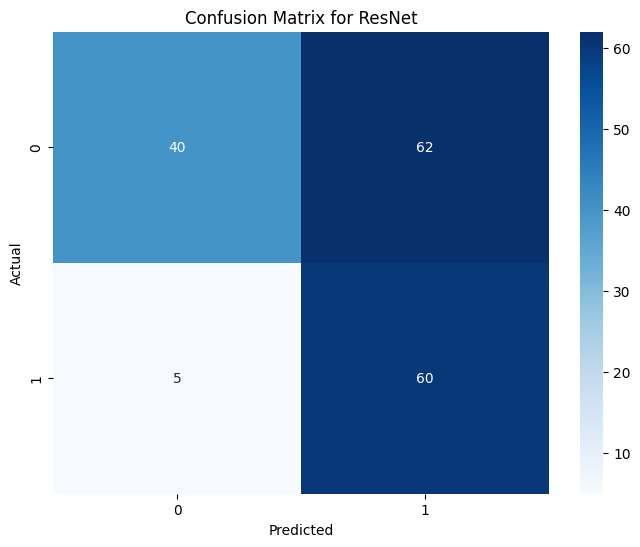

In [ ]:
# Define the threshold for classification
threshold = 0.5

# Convert predictions and actual values to binary for both targets
y_pred_class_0 = (y_pred[:, 0] > threshold).astype(int)  # Solar generation
y_pred_class_1 = (y_pred[:, 1] > threshold).astype(int)  # Wind generation

y_test_class_0 = (y_test_original[:, 0] > threshold).astype(int)  # Actual solar generation
y_test_class_1 = (y_test_original[:, 1] > threshold).astype(int)  # Actual wind generation

# Confusion Matrix for Solar Generation
conf_matrix_solar = confusion_matrix(y_test_class_0, y_pred_class_0)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_solar, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ResNet')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, r2_score

# Assuming y_test_original and y_pred are defined for your regression model predictions
# Calculate R² for solar generation
r2_solar = r2_score(y_test_original[:, 0], y_pred[:, 0])  # Adjust index for solar generation

# Calculate R² for wind generation
r2_wind = r2_score(y_test_original[:, 1], y_pred[:, 1])  # Adjust index for wind generation

# Create classification reports
classification_report_solar = classification_report(y_test_class_0, y_pred_class_0, output_dict=True)
classification_report_wind = classification_report(y_test_class_1, y_pred_class_1, output_dict=True)

# Print classification report for solar generation with R²
print("Classification Report for Solar Generation:")
print(classification_report_solar)
print(f"R-squared (R²) score for Solar Generation: {r2_solar}")

# Print classification report for wind generation with R²
print("Classification Report for Wind Generation:")
print(classification_report_wind)
print(f"R-squared (R²) score for Wind Generation: {r2_wind}")


Classification Report for Solar Generation:
{'0': {'precision': 0.8888888888888888, 'recall': 0.39215686274509803, 'f1-score': 0.54421768707483, 'support': 102.0}, '1': {'precision': 0.4918032786885246, 'recall': 0.9230769230769231, 'f1-score': 0.6417112299465241, 'support': 65.0}, 'accuracy': 0.5988023952095808, 'macro avg': {'precision': 0.6903460837887068, 'recall': 0.6576168929110106, 'f1-score': 0.592964458510677, 'support': 167.0}, 'weighted avg': {'precision': 0.7343346094695854, 'recall': 0.5988023952095808, 'f1-score': 0.5821642756177049, 'support': 167.0}}
R-squared (R²) score for Solar Generation: 0.9814940819516753
Classification Report for Wind Generation:
{'1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 167.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 167.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 167.0}}
R-squared (R²) score for Wind Generation: 0.9675340591974088